In [1]:
import sys
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
import numpy as np
import matplotlib.pyplot as plt
from PDE2D.BoundaryShape import *
%matplotlib inline
import drjit as dr
from mitsuba import Float, Point2f, PCG32, UInt, Bool

In [2]:
dr.squared_norm(Point2f(3,4))

[25]

In [3]:
r = 1;
num_points = 15
theta = np.linspace(0,2*np.pi * (num_points-1)/ num_points,num_points) + np.pi/10
x = r * np.cos(theta)
y = r * np.sin(theta)
points = np.stack((x , y) , axis = 0)
points =Point2f(points)

## Check Boundary Closest Points 

### Circle

In [4]:
shape = CircleShape(radius = 2.0, origin = [0.3, 0.3])
bi = shape.boundary_interaction(points, radius_fnc = None, star_generation = False, max_radius = Float(dr.inf))

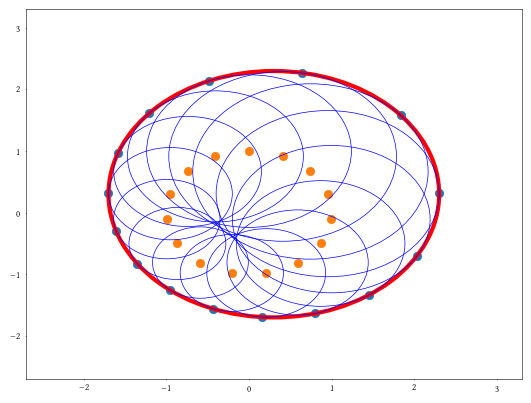

In [5]:
fig, ax = plt.subplots()
ax.scatter(bi.bpoint[0], bi.bpoint[1])
ax.scatter(points[0],points[1])
circle = plt.Circle(shape.origin[0],shape.radius[0],fill=False,color="red", linewidth = 3)
ax.add_patch(circle)
for i in range(num_points):
    boundary_circle = plt.Circle(points.numpy()[:,i],bi.r.numpy()[i],fill=False,color="blue")
    ax.add_patch(boundary_circle)
    
    
ax.set_xlim((-2.7, 3.3))
ax.set_ylim((-2.7, 3.3))
plt.show()

In [6]:
sampler = PCG32(dr.width(points), dr.arange(UInt, dr.width(points)))
points += Point2f(sampler.next_float32(), sampler.next_float32()) 
directions = - dr.normalize(Point2f(points))
#directions = mi.Array2f(directions[1], -directions[0])
shape.inside = True
ri = shape.ray_intersect(BoundaryInfo(points), directions)
intersect = ri.intersected.numpy()
directions = ri.direction.numpy()


<class 'mitsuba.cuda_ad_rgb.Point2f'>


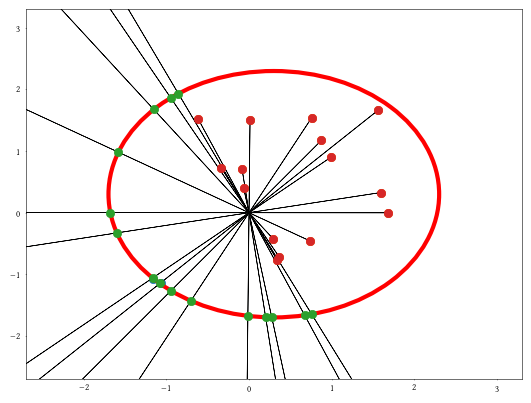

In [7]:
fig, ax = plt.subplots()
ax.scatter(intersect[:,0], intersect[:,1])
ax.scatter(points[0],points[1])
circle = plt.Circle(shape.origin[0], shape.radius[0],fill=False,color="red", linewidth = 3)
ax.add_patch(circle)
for i in range(num_points):
    ax.arrow(points[0,i], points[1, i], 8 * directions[0, i], 8 * directions[1, i])
ax.scatter(intersect[0,:], intersect[1,:])
ax.scatter(points[0],points[1])

    
ax.set_xlim((-2.7, 3.3))
ax.set_ylim((-2.7, 3.3))
plt.show()

## Check the interior points

### Circle

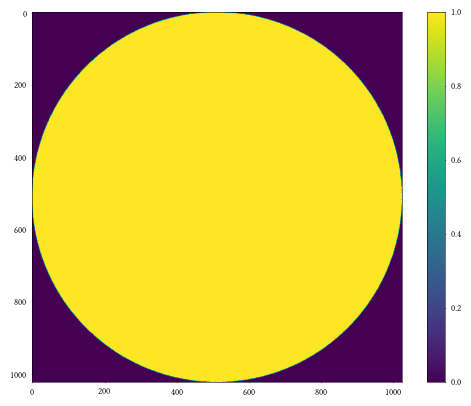

In [8]:
from PDE2D.utils.imageUtils import create_image_points
shape = CircleShape(radius = 8)
resolution = [1024,1024]
points = create_image_points(resolution = resolution, bbox = [[-8,-8],[8,8]], spp =  1)
active = shape.inside_closed_surface_mask(points)
image = dr.select(active, 1, 0)
image = image.numpy().reshape(resolution[0],resolution[1])
plt.imshow(image)
plt.colorbar()

## Check Special Functions

In [9]:
from scipy.special import k0 as k0_scipy
from scipy.special import i0 as i0_scipy
import sys
sys.path.append("../../../source/")
import drjit as dr

import numpy as np

from PDE2D.Sampling.special import *
from scipy.special import i1 as i1_scipy
from scipy.special import k1 as k1_scipy
import matplotlib.pyplot as plt

In [10]:
num_points = 10000
max_num = 100

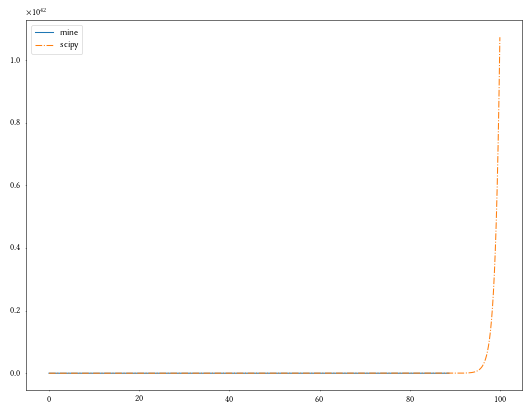

In [11]:
x = np.linspace(0,max_num,num_points)
a = i0(Float(x))
plt.plot(x,i0(Float(x)).numpy(),"-",label = "mine")
plt.plot(x,i0_scipy(x),"-.", label = "scipy")
plt.legend()

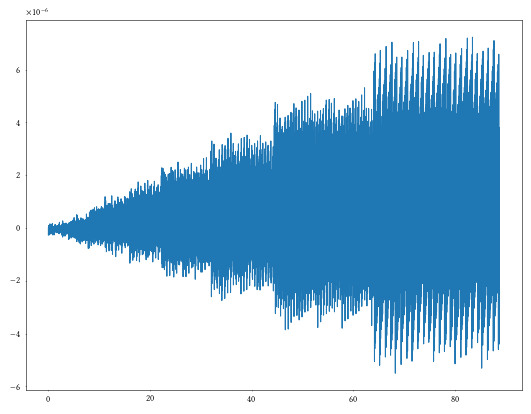

In [12]:
plt.plot(x,(i0_scipy(x) - i0(Float(x)))/i0_scipy(x))

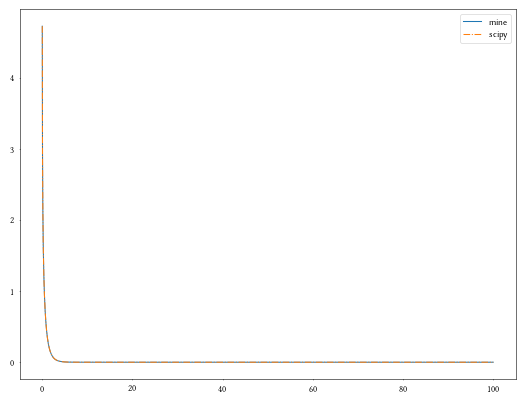

In [13]:
x = np.linspace(0, max_num, num_points)
plt.plot(x, k0(Float(x)).numpy(), "-", label="mine")
plt.plot(x, k0_scipy(x), "-.", label="scipy")
plt.legend()

/tmp/ipykernel_2241115/4210185889.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.plot(x,(k0_scipy(x) - k0(Float(x)))/k0_scipy(x))


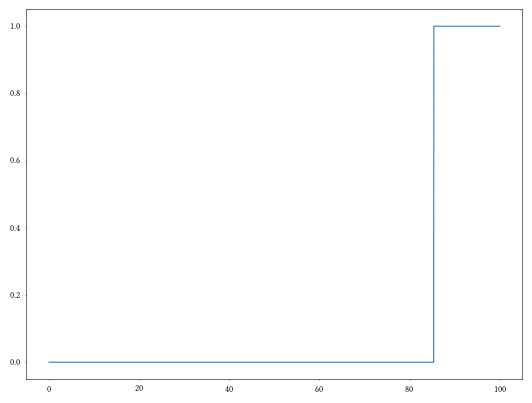

In [14]:
plt.plot(x,(k0_scipy(x) - k0(Float(x)))/k0_scipy(x))

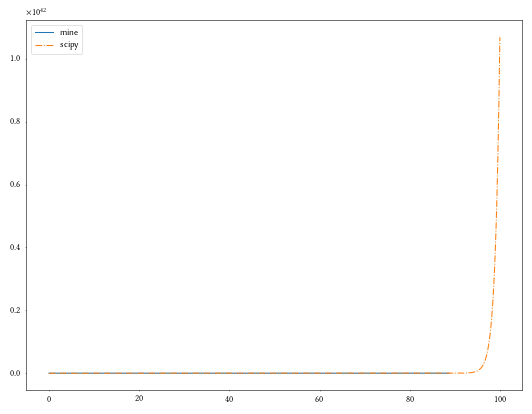

In [15]:
x = np.linspace(0, max_num, num_points)
plt.plot(x, i1(Float(x)).numpy(), "-", label="mine")
plt.plot(x, i1_scipy(x), "-.", label="scipy")
plt.legend()


/tmp/ipykernel_2241115/2896268575.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(x,(i1_scipy(x) - i1(Float(x)))/i1_scipy(x))


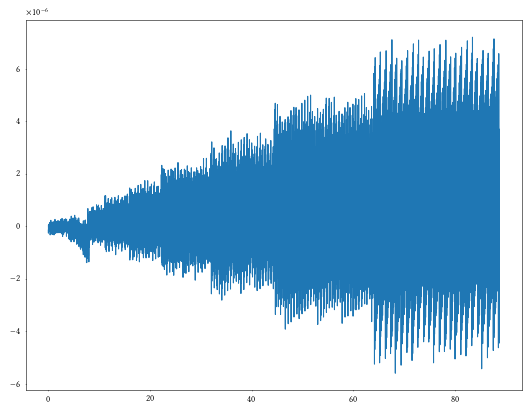

In [16]:
plt.plot(x,(i1_scipy(x) - i1(Float(x)))/i1_scipy(x))

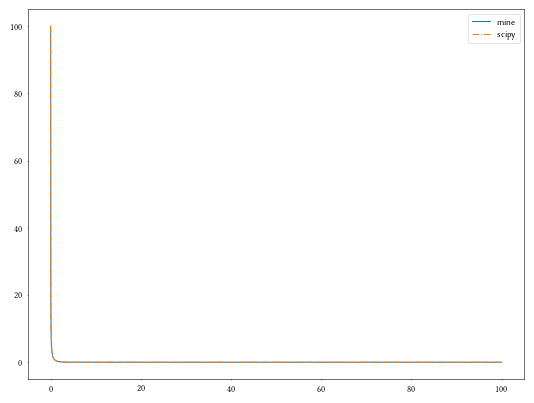

In [17]:
x = np.linspace(0, max_num, num_points)
plt.plot(x, k1(Float(x)).numpy(), "-", label="mine")
plt.plot(x, k1_scipy(x), "-.", label="scipy")
plt.legend()


/tmp/ipykernel_2241115/3581606356.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.plot(x,(k1_scipy(x) - k1(Float(x)))/k1_scipy(x))


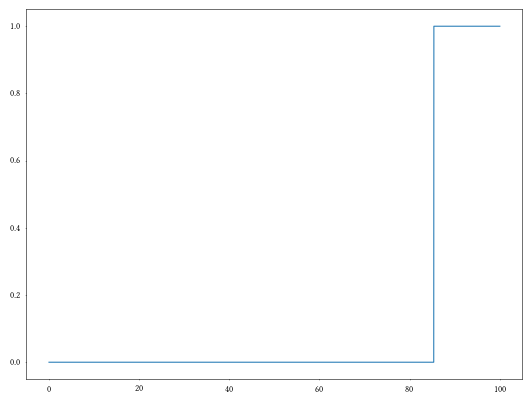

In [18]:
plt.plot(x,(k1_scipy(x) - k1(Float(x)))/k1_scipy(x))

In [19]:
print(i0_scipy(0))
print(k0_scipy(0))
print(i1_scipy(0))
print(k1_scipy(0))

1.0
inf
0.0
inf


In [20]:

print(i0(mi.Float(0)))
print(k0(mi.Float(0)))
print(i1(mi.Float(0)))
print(k1(mi.Float(0)))


[1]
[inf]
[0]
[inf]


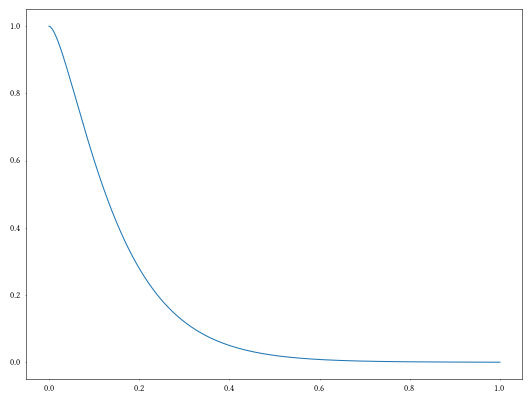

In [21]:
import numpy as np
from scipy.special import k0 as k0_scipy
from scipy.special import i0 as i0_scipy
from scipy.special import k1 as k1_scipy
from scipy.special import i1 as i1_scipy
from matplotlib import pyplot as plt
R = 1
sigma = 100
num_points = 10000
r = np.linspace(1e-6, R, num_points)
sqrt_sigma = np.sqrt(sigma) 
fnc = r * sqrt_sigma * (k1_scipy(r * sqrt_sigma) - k1_scipy(R * sqrt_sigma) / i1_scipy(R * sqrt_sigma) * i1_scipy(r * sqrt_sigma))
plt.plot(r, fnc)